<a href="https://colab.research.google.com/github/FelixBuk/tod-Colab/blob/main/05_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Визуализация данных

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* Макрушин С.В. Лекция "Визуализация данных".
* https://numpy.org/doc/stable/reference/generated/numpy.load.html
* https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html
* https://matplotlib.org/stable/gallery/subplots_axes_and_figures/shared_axis_demo.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html#pandas.DataFrame.plot
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.bar.html
* https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.pie.html
* https://seaborn.pydata.org/examples/index.html
* https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

## Задачи для совместного разбора

1. При помощи пакета `pandas_datareader` загрузите данные о ценах акций Apple с 2017-01-01 по 2018-12-31. Визуализируйте временные ряд цен акций.

In [ ]:
!pip install pandas_datareader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


2. Проанализируйте временной ряд максимальной цены акций на предмет выбросов.

## Лабораторная работа 5.1

__Данная работа подразумевает построение рисунков. В связи с этим задания, для которых не будет виден результат выполнения ячеек (получившиеся рисунки), засчитаны не будут вне зависимости от правильности решения.__

### Визуализация данных при помощи пакета `matplotlib`

__В данном блоке задач не разрешается использовать другие пакеты для визуализации, кроме `matplotlib`.__

1\. В файле `average_ratings.npy` содержится информация о среднем рейтинге 3 рецептов за период с 01.01.2019 по 30.12.2021. При помощи пакета `matplotlib` в _одной системе координат_ (на одной картинке) изобразите три временных ряда, соответствующих средним рейтингам этих рецептов. 

По горизонтальной оси располагается номер дня (0, 1, 2, ...), по вертикальной - средний рейтинг рецептов в этот день. 

Названия рецептов и их индексы в файле `average_ratings.npy`:
```
0: waffle iron french toast
1: zwetschgenkuchen bavarian plum cake
2: lime tea
```

Результатом работы является визуализация, на которой:
* добавлена подпись горизонтальной оси с текстом "Номер дня"
* добавлена подпись вертикальной оси с текстом "Средний рейтинг"
* добавлена подпись рисунка с текстом "Изменение среднего рейтинга трех рецептов"
* каждый из временных рядов имеет уникальный цвет
* добавлена легенда, на которой отображается название каждого из рецептов

_Примечание_ : для считывания файла воспользуйтесь функцией `np.load`.

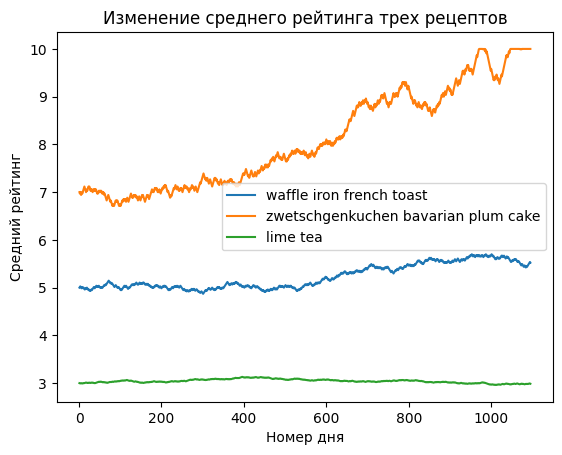

In [ ]:
import numpy as np
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt
import pandas as pd
d1 = np.load(r'/content/average_ratings.npy')
plt.plot(range(1, len(d1[0])+1), d1[0], label='waffle iron french toast')
plt.plot(range(1, len(d1[1])+1),d1[1], label='zwetschgenkuchen bavarian plum cake')
plt.plot(range(1, len(d1[2])+1),d1[2], label='lime tea')
 
plt.legend()
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Номер дня')
plt.ylabel('Средний рейтинг')
plt.show()

2\. Измените визуализацию, полученную в задании 1, таким образом, чтобы по горизонтальной оси отображались года, а между двумя соседними годами располагались засечки, соответствующие месяцам. Для этого создайте диапазон дат от 01.01.2019 по 30.12.2021 с шагом в один день (например, [вот так](https://pandas.pydata.org/docs/reference/api/pandas.date_range.html)) и используйте этот диапазон при вызове метода `plot`. Далее настройте `major_locator` и `minor_locator` горизонтальной оси (подробнее см. [здесь](https://matplotlib.org/stable/gallery/text_labels_and_annotations/date.html))

Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 1. Измените подпись горизонтальной оси, написав там слово "Дата".


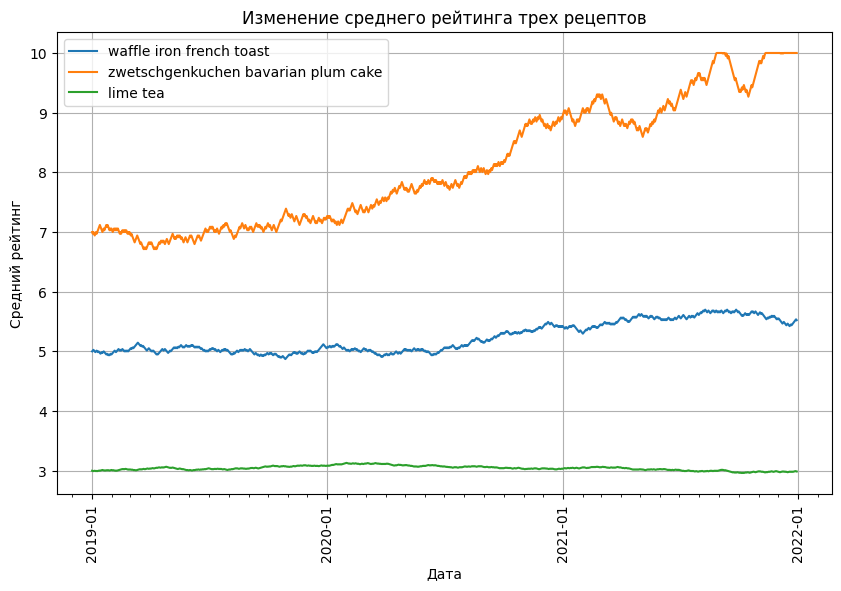

"plt.plot(dat,d1[1], label='zwetschgenkuchen bavarian plum cake')\nplt.plot(dat,d1[2], label='lime tea')\nd1.set_major_locator(mdates.MonthLocator(bymonth=(1, 7)))\nplt.set_minor_locator(mdates.MonthLocator())\nplt.grid(True)\n\nplt.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%b'))\nfor label in ax.get_xticklabels(which='major'):\n    label.set(rotation=30, horizontalalignment='right')\n"

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import numpy as np
import pandas as pd

d1 = np.load(r'/content/average_ratings.npy')
dates = pd.date_range(start='2019-01-01', end='2021-12-30')
data1 = pd.Series(data=d1[0], index=dates)
data2 = pd.Series(data=d1[1], index=dates)
data3 = pd.Series(data=d1[2], index=dates)
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(data1)
ax.plot(data2)
ax.plot(data3)


ax.xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13))) # Основные засечки на годы
ax.xaxis.set_minor_locator(mdates.MonthLocator()) # Дополнительные засечки на месяцы
plt.xticks(rotation=90)
plt.grid(True)
plt.legend(['waffle iron french toast', 'zwetschgenkuchen bavarian plum cake', 'lime tea'])
plt.title('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
plt.ylabel('Средний рейтинг')
plt.show()


3\. Измените визуализацию, полученную в задании 2, разбив одну картинку на три, расположенных друг под другом. Три изображения должны иметь одну общую горизонтальную ось (каждое изображение засечки в нижней части, но значения этих засечек находятся только под самым нижним изображением). Примените к получившемуся рисунку цвета графиков, подписи, легенду из задания 2. 

Text(0, 0.5, 'Средний рейтинг')

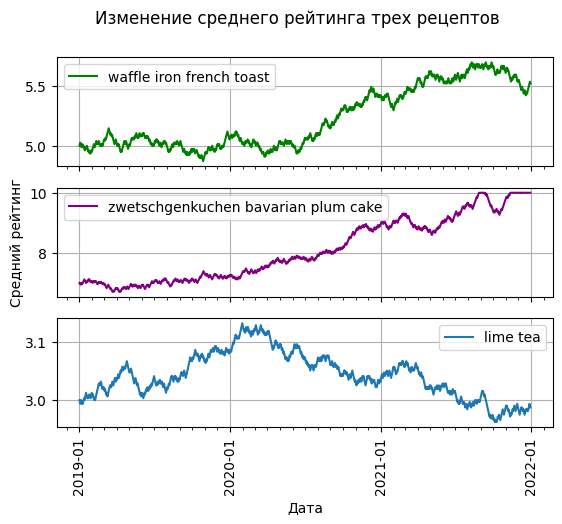

In [ ]:
fig, axes = plt.subplots(nrows=3, ncols=1,  sharex=True)  #благодаря sharex подписи осей становятся общими для всех графиков

dates = pd.date_range(start='2019-01-01', end='2021-12-30')
data1 = pd.Series(data=d1[0], index=dates)
data2 = pd.Series(data=d1[1], index=dates)
data3 = pd.Series(data=d1[2], index=dates)

axes[0].plot(data1, color='green')
axes[1].plot(data2, color='purple')
axes[2].plot(data3)

axes[2].xaxis.set_major_locator(mdates.MonthLocator(bymonth=(1, 13))) # Основные засечки на годы
axes[2].xaxis.set_minor_locator(mdates.MonthLocator()) # Дополнительные засечки на месяцы
plt.xticks(rotation=90)

axes[0].legend(['waffle iron french toast'])
axes[1].legend(['zwetschgenkuchen bavarian plum cake'])
axes[2].legend(['lime tea'])

axes[0].grid(True)
axes[1].grid(True)
axes[2].grid(True)

fig.suptitle('Изменение среднего рейтинга трех рецептов')
plt.xlabel('Дата')
axes[1].set_ylabel('Средний рейтинг')   #устанавливаем в середине название оси y

4\. В файле `visitors.npy` представлена информация о количестве посетителей сайта в течении первых 100 дней после объявления сайтом акции. Постройте график изменения количества пользователей в зависимости от дня в двух вариантах, расположенных рядом по горизонтале. В обоих случаях изобразите график в виде ломаной, но в первом случае оставьте линейный масштаб осей, а во втором случае сделайте вертикальную ось в логарифмическом масштабе. Добавьте на обе картинки подпись над этим графиком к текстом $y(x)=\lambda e^{-\lambda x}$

Добавьте на оба изображения красную горизонтальную линию на уровне $y=100$. Добавьте на обе картинки подпись над этой линией с текстом $y(x)=100$

Добавьте на оба изображения подписи осей; горизонтальную ось подпишите текстом "Количество дней с момента акции", вертикальную - "Число посетителей".

Добавьте общий заголовок для фигуры с текстом "Изменение количества пользователей в линейном и логарифмическом масштабе".


Text(0.5, 0.98, 'Изменение количества пользователей в линейном и логарифмическом масштабе')

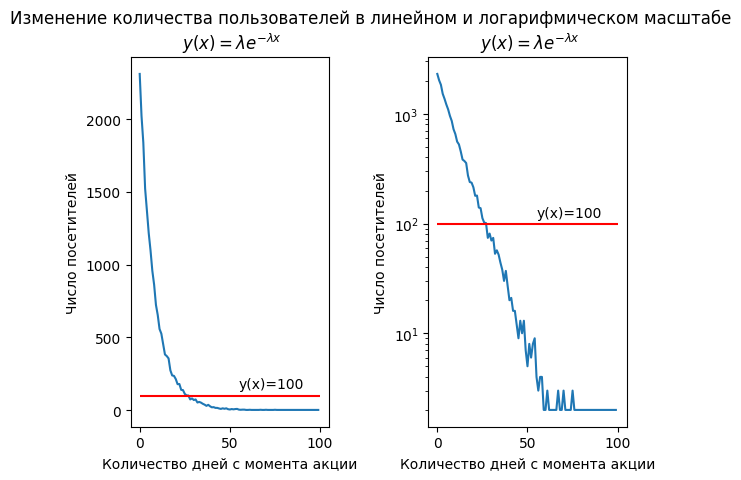

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook
import numpy as np
import pandas as pd

d2 = np.load(r'/content/visitors.npy')
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.subplots_adjust(wspace = 0.5)  #увеличиваю расстояние между графиками

axes[0].plot(d2)
axes[1].set_yscale("log")
axes[1].plot(d2)

axes[0].title.set_text(r'$\ y(x)=λe^{−λx}$')
axes[1].title.set_text(r'$\ y(x)=\lambda e^{−\lambda x}$')   #2 варианта

axes[0].hlines(100, 0, 100, color='r')  #точка на оси y(так как hlines по горизонтали), начало и конец линии
axes[1].hlines(100, 0, 100, color='r')

axes[0].text(55, 150, 'y(x)=100') #подписываю линии
axes[1].text(55, 115, 'y(x)=100')

axes[0].set_xlabel('Количество дней с момента акции')
axes[0].set_ylabel('Число посетителей')
axes[1].set_xlabel('Количество дней с момента акции')
axes[1].set_ylabel('Число посетителей')

fig.suptitle('Изменение количества пользователей в линейном и логарифмическом масштабе')

## Лабораторная работа 5.2

### Визуализация данных на основе структур `pandas`.

Для продолжения работы загрузите таблицы recipes и reviews (__ЛР2__)

In [ ]:
import csv
import numpy as np
import pandas as pd
review = pd.read_csv(r'/content/reviews_sample.csv', delimiter=',')
recipe = pd.read_csv(r'/content/recipes_sample.csv', delimiter=',')
recipe['submitted'] = pd.to_datetime(recipe['submitted'])
print(review)
print(recipe)

        Unnamed: 0     user_id  recipe_id        date  rating  \
0           370476       21752      57993  2003-05-01       5   
1           624300      431813     142201  2007-09-16       5   
2           187037      400708     252013  2008-01-10       4   
3           706134  2001852463     404716  2017-12-11       5   
4           312179       95810     129396  2008-03-14       5   
...            ...         ...        ...         ...     ...   
126691     1013457     1270706     335534  2009-05-17       4   
126692      158736     2282344       8701  2012-06-03       0   
126693     1059834      689540     222001  2008-04-08       5   
126694      453285  2000242659     354979  2015-06-02       5   
126695      691207      463435     415599  2010-09-30       5   

                                                   review  
0       Last week whole sides of frozen salmon fillet ...  
1       So simple and so tasty!  I used a yellow capsi...  
2       Very nice breakfast HH, easy to

5\. Назовем рецепты короткими, если они занимают строго меньше 5 минут; средними, если они занимают от 5 до 50 минут (не включая 50), и длинными, если они занимают от 50 минут и больше. Сгруппируйте все рецепты по данному признаку и для каждой группы посчитайте 2 величины: среднее количество шагов рецептов в группе и размер группы. При помощи методов структур `pandas` постройте столбчатую диаграмму, где каждый столбец означает группу (короткие, средние или длинные рецепты), а высота столбца обозначает среднее количество шагов рецептов в группе. Рядом по горизонтали разместите круговую диаграмму, на которой отображены размеры каждой из групп.

Добавьте следующие подписи:
* по горизонтальной оси под столбчатой диаграммой напишите "Группа рецептов"
* по вертикальной оси слева от столбчатой диаграммы напишите "Средняя длительность"
* над круговой диаграммой напишите "Размеры групп рецептов"

Text(0.5, 1.0, 'Размеры групп рецептов')

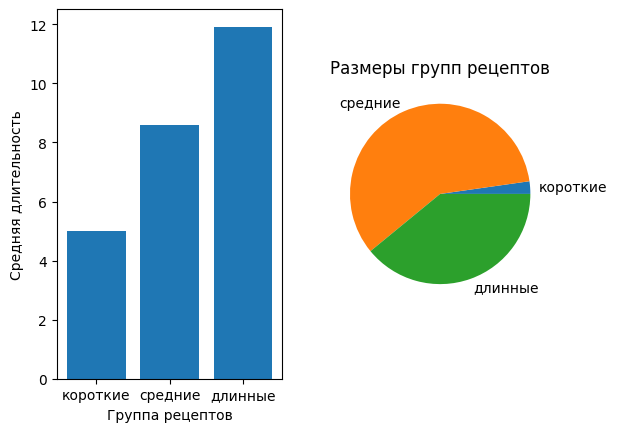

In [ ]:
korot = recipe[recipe.minutes<5]
sred = recipe[(recipe.minutes>=5)&(recipe.minutes<50)]
dlin = recipe[recipe.minutes>=50]

s_korot = (recipe['n_steps'][korot.index]).mean()
s_sred = (recipe['n_steps'][sred.index]).mean()
s_dlin = (recipe['n_steps'][dlin.index]).mean()

l_korot = len(korot)
l_sred = len(sred)
l_dlin = len(dlin)

fig, axes = plt.subplots(nrows=1, ncols=2)
axes = axes.flatten()
types_rec = ['короткие', 'средние', 'длинные']

axes[0].bar(types_rec, [s_korot, s_sred, s_dlin])
axes[0].set_xlabel('Группа рецептов')
axes[0].set_ylabel('Средняя длительность')

axes[1].pie([l_korot, l_sred, l_dlin], labels=types_rec)
axes[1].set_title('Размеры групп рецептов')

6\. Из всего множества отзывов оставьте только те, которые были даны в 2008 и 2009 годах. Воспользовавшись возможностями метода `pd.DataFrame.plot.hist`, постройте 2 гистограммы столбца `rating`. Гистограммы должны быть расположены рядом по горизонтали. Левая гистограмма соотвествует 2008 году, правая - 2009 году. Добавьте общую подпись для рисунка с текстом "Гистограммы рейтинга отзывов в 2008 и 2009 годах". Добейтесь того, чтобы подпись вертикальной оси правого рисунка не "наезжала" на левый рисунок.

array([[<Axes: title={'center': '2008'}, ylabel='Frequency'>,
        <Axes: title={'center': '2009'}, ylabel='Frequency'>]],
      dtype=object)

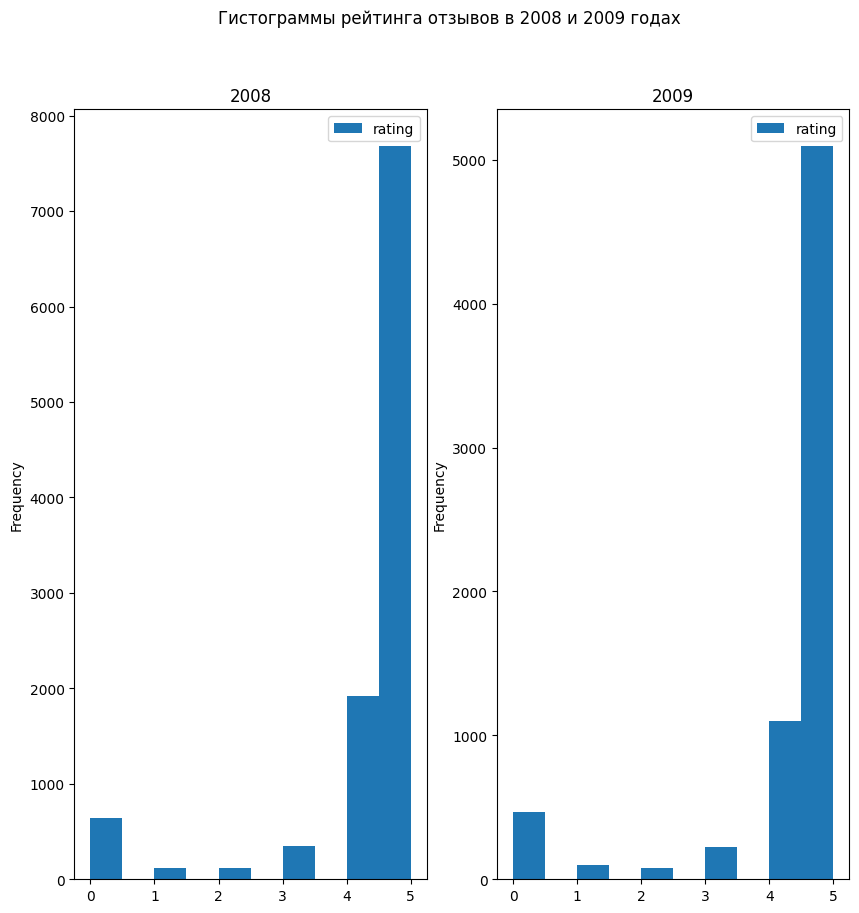

In [ ]:
review.rename(columns = {'recipe_id':'id'}, inplace = True)
recrev1 = pd.merge(recipe, review, on='id', how='outer')
recrev1['submitted'] = pd.to_datetime(recrev1['submitted'])
recrev1['year'] = recrev1['submitted'].dt.year

rec_8_9 = pd.DataFrame({'year':recrev1[(recrev1['submitted'].dt.year == 2008)|(recrev1['submitted'].dt.year == 2009)].year, 'rating':recrev1[(recrev1['submitted'].dt.year == 2008)|(recrev1['submitted'].dt.year == 2009)].rating})
rec_8_9.plot.hist(column='rating', by='year', title='Гистограммы рейтинга отзывов в 2008 и 2009 годах',layout = (1, 2), figsize=(10,10))

### Визуализация данных при помощи пакета `seaborn`

7\. При помощи пакета `seaborn` постройте диаграмму рассеяния двух столбцов из таблицы `recipes`: `n_steps` и `n_ingredients`. Укажите в качестве группирующей переменной (hue) категориальную длительность рецепта (короткий, средний или длинные; см. задание 5). 

Добавьте заголовок рисунка "Диаграмма рассеяния n_steps и n_ingredients"

Прокомментируйте, наблюдается ли визуально линейная зависимость между двумя этими переменными. Ответ оставьте в виде текстовой ячейки под изображением.

Text(0.5, 1.0, 'Диаграмма рассеяния n_steps и n_ingredients')

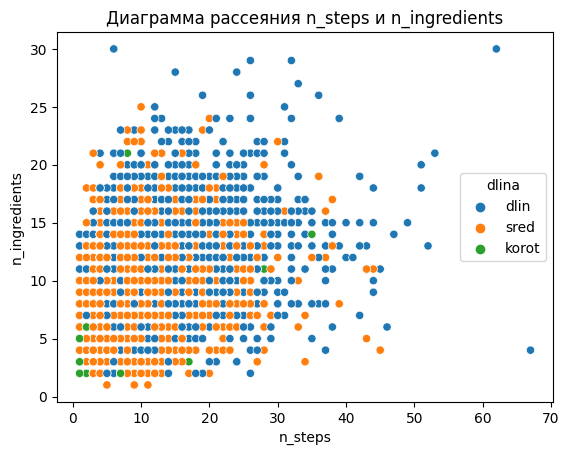

In [ ]:
import seaborn as sns
def f(row):
  if row['minutes']<5:
    val = 'korot'
  elif row['minutes'] >= 5 and row['minutes'] <50:
    val = 'sred'
  elif row['minutes'] >= 50:
    val = 'dlin'
  return val
recipe['dlina'] = recipe.apply(f, axis=1)

d3 = pd.DataFrame({'n_steps':recipe['n_steps'], 'n_ingredients':recipe['n_ingredients'], 'dlina':recipe['dlina']})
sns.scatterplot(data=d3, x="n_steps", y="n_ingredients", hue="dlina").set_title('Диаграмма рассеяния n_steps и n_ingredients')

#Да, линейная зависимость между двумя этими переменными наблюдается. Чем больше шагов и ингредиентов, тем больше времени уделяется на рецепт.

8\. Объедините две таблицы `recipes` и `reviews` и постройте корреляционную матрицу на основе столбцов "minutes", "n_steps", "n_ingredients" и "rating". При помощи пакета `seaborn` визуализируйте полученную матрицу в виде тепловой карты (heatmap). 

Добавьте в ячейки тепловой карты подписи (значения к-та корреляции). Измените цветовую палитру на `YlOrRd`. 

Добавьте заголовок рисунка "Корреляционная матрица числовых столбцов таблиц recipes и reviews"

Text(0.5, 1.0, 'Корреляционная матрица числовых столбцов таблиц recipes и reviews')

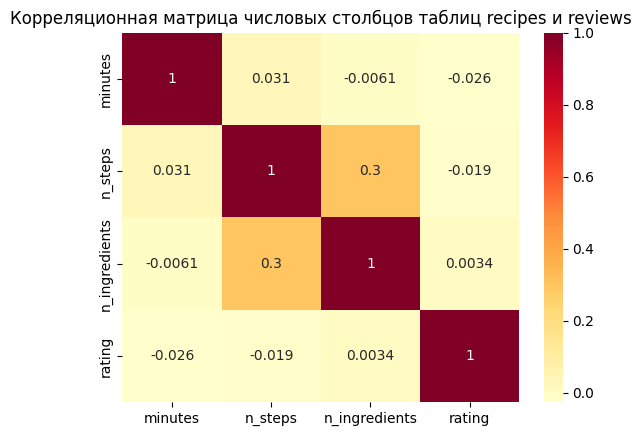

In [ ]:
recrev2 = recrev1[["minutes", "n_steps", "n_ingredients", "rating"]].copy()

sns.heatmap(recrev2.corr(), annot=True, cmap='YlOrRd').set_title('Корреляционная матрица числовых столбцов таблиц recipes и reviews')